the best modeli is "/Users/ahmetbekir/AI-Driven-Food-Crisis-Prediction-Using-Satellite-And-Climate-Data/notebooks/lstm_ndvi_global_model3.h5"


In [1]:
import sys
import os
sys.path.append(os.path.abspath("..")) 

In [29]:

import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

# --- Dataset oluşturma ---
def create_dataset(data, window_size=6):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# --- CSV'leri oku ve birleştir ---
def load_ndvi_data(folder_path, window_size=6):
    all_files = glob.glob(os.path.join(folder_path, "*.csv"))
    all_series = []

    for file in all_files:
        df = pd.read_csv(file)
        df = df.dropna()
        series = df["ndvi"].values.reshape(-1, 1)
        all_series.append(series)

    full_series = np.vstack(all_series)
    scaler = MinMaxScaler()
    full_scaled = scaler.fit_transform(full_series)

    X, y = create_dataset(full_scaled, window_size)
    return X, y, scaler

# --- Ana Eğitim Fonksiyonu ---
def train_lstm_ndvi_model(data_path="models", model_save_path="lstm_ndvi_model3.h5"):
    start_time = time.time()

    print("📁 Veri hazırlanıyor...")
    X, y, scaler = load_ndvi_data(data_path, window_size=6)

    # Train / Val böl
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

    print(f"🔢 Eğitim örnekleri: {X_train.shape}, Doğrulama: {X_val.shape}")

    # Model
    model = Sequential([
        LSTM(64, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=1, validation_data=(X_val, y_val))

    # Tahminler
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Ölçek geri çevir
    y_train_true = scaler.inverse_transform(y_train)
    y_train_pred = scaler.inverse_transform(y_train_pred)
    y_val_true = scaler.inverse_transform(y_val)
    y_val_pred = scaler.inverse_transform(y_val_pred)

    # Metrikler
    train_mae = mean_absolute_error(y_train_true, y_train_pred)
    val_mae = mean_absolute_error(y_val_true, y_val_pred)
    train_mse = mean_squared_error(y_train_true, y_train_pred)
    val_mse = mean_squared_error(y_val_true, y_val_pred)
    from sklearn.metrics import r2_score
    # R² skorları
    train_r2 = r2_score(y_train_true, y_train_pred)
    val_r2 = r2_score(y_val_true, y_val_pred)

   

    print(f"\n📊 Performans:")
    print(f"✅ MAE (Train): {train_mae:.4f}, MSE: {train_mse:.4f}")
    print(f"✅ MAE (Val)  : {val_mae:.4f}, MSE: {val_mse:.4f}")
    print(f"📊 R² (Train): {train_r2:.4f}")
    print(f"📊 R² (Val)  : {val_r2:.4f}")
    # Grafik
    plt.figure(figsize=(14, 4))
    plt.plot(y_val_true, label="Gerçek NDVI (Val)")
    plt.plot(y_val_pred, label="Model Tahmini (Val)")
    plt.title("Doğrulama Verisi Üzerinde NDVI Tahmini")
    plt.xlabel("Zaman")
    plt.ylabel("NDVI")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Modeli kaydet
    model.save(model_save_path)
    print(f"💾 Model kaydedildi: {model_save_path}")

    print(f"⏱️ Süre: {time.time() - start_time:.2f} saniye")

# --- Çalıştırmak için ---
# train_lstm_ndvi_model(data_path="ndvi_data", model_save_path="lstm_ndvi_global_model.h5")


📁 Veri hazırlanıyor...
🔢 Eğitim örnekleri: (486, 6, 1), Doğrulama: (122, 6, 1)
Epoch 1/200


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1252 - val_loss: 0.0554
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0370 - val_loss: 0.0500
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0351 - val_loss: 0.0458
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0347 - val_loss: 0.0424
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0327 - val_loss: 0.0383
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.0291 - val_loss: 0.0374
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0287 - val_loss: 0.0336
Epoch 8/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0278 - val_loss: 0.0316
Epoch 9/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0271 - val_loss: 0.0315
Epoch 10/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0249 - val_loss: 0.0292
Epoch 11/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0240 - val_loss: 0.0279
Epoch 12/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0275 - val_

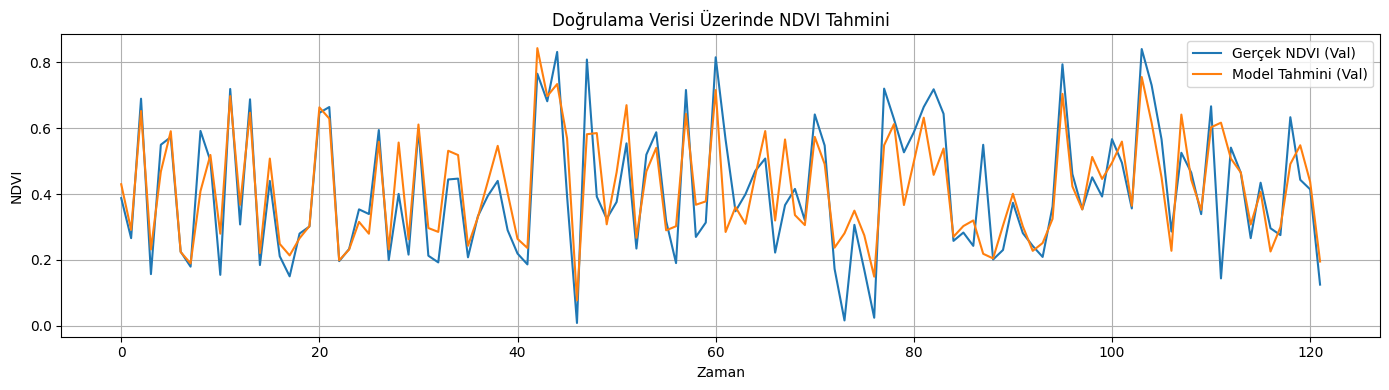

💾 Model kaydedildi: lstm_ndvi_global_model3.h5
⏱️ Süre: 15.11 saniye


In [30]:
train_lstm_ndvi_model(data_path="ndvi_data", model_save_path="lstm_ndvi_global_model3.h5")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
📊 Test Sonuçları (iowa):
✅ MAE : 0.0628
✅ MSE : 0.0070
✅ R²  : 0.8945


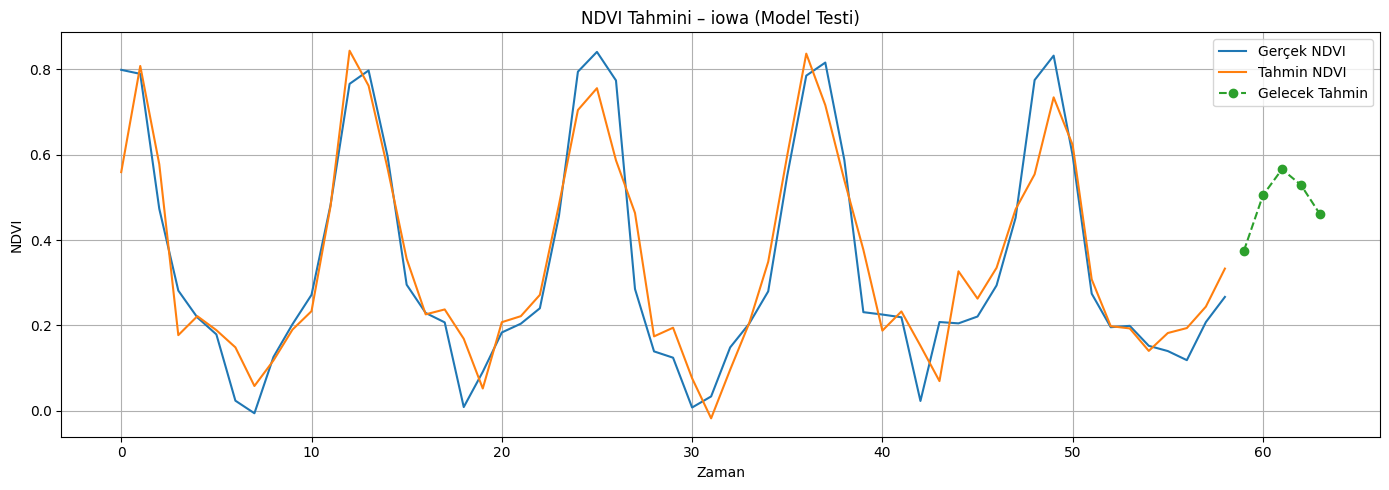

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# --- Ayarlar ---
csv_path = "/Users/ahmetbekir/AI-Driven-Food-Crisis-Prediction-Using-Satellite-And-Climate-Data/notebooks/ndvi_data/ndvi_iowa.csv"
model_path = "/Users/ahmetbekir/AI-Driven-Food-Crisis-Prediction-Using-Satellite-And-Climate-Data/notebooks/lstm_ndvi_global_model3.h5"
window_size = 6
future_months = 5

# --- Veriyi oku ve ölçekle ---
df = pd.read_csv(csv_path).dropna()
ndvi = df["ndvi"].values.reshape(-1, 1)

scaler = MinMaxScaler()
ndvi_scaled = scaler.fit_transform(ndvi)

# --- Giriş-çıkış verisi oluştur ---
X = []
for i in range(len(ndvi_scaled) - window_size):
    X.append(ndvi_scaled[i:i + window_size])
X = np.array(X)
y = ndvi_scaled[window_size:]

# --- Modeli yükle ---
model = load_model(model_path, compile=False)

# --- Tahmin ---
y_pred = model.predict(X)
y_true = scaler.inverse_transform(y)
y_pred_inv = scaler.inverse_transform(y_pred)

# --- Metrikler ---
mae = mean_absolute_error(y_true, y_pred_inv)
mse = mean_squared_error(y_true, y_pred_inv)
r2 = r2_score(y_true, y_pred_inv)

print(f"📊 Test Sonuçları (iowa):")
print(f"✅ MAE : {mae:.4f}")
print(f"✅ MSE : {mse:.4f}")
print(f"✅ R²  : {r2:.4f}")

# --- Gelecek 5 ay tahmini ---
last_window = ndvi_scaled[-window_size:]
future_preds = []
for _ in range(future_months):
    input_seq = last_window.reshape(1, window_size, 1)
    pred_scaled = model.predict(input_seq, verbose=0)
    future_preds.append(pred_scaled[0][0])
    last_window = np.concatenate([last_window[1:], pred_scaled.reshape(1, 1)], axis=0)


future_preds_inv = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# --- Grafik ---
plt.figure(figsize=(14, 5))
plt.plot(y_true, label="Gerçek NDVI")
plt.plot(y_pred_inv, label="Tahmin NDVI")
plt.plot(range(len(y_pred_inv), len(y_pred_inv) + future_months), future_preds_inv,
         label="Gelecek Tahmin", linestyle="--", marker="o")
plt.title("NDVI Tahmini – iowa (Model Testi)")
plt.xlabel("Zaman")
plt.ylabel("NDVI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
son_ndvi = y_pred_inv[-1][0]
print(f"📌 Son tahmin edilen NDVI: {son_ndvi:.4f}")


📌 Son tahmin edilen NDVI: 0.3332


In [40]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Gelecek aylar için tarih etiketleri
start_date = df["year"].astype(str) + "-" + df["month"].astype(str)
last_date = pd.to_datetime(start_date).max()
future_dates = [last_date + relativedelta(months=i+1) for i in range(future_months)]

print("📅 Gelecek 5 ay NDVI tahminleri:")
for d, val in zip(future_dates, future_preds_inv):
    print(f"{d.strftime('%Y-%m')}: {val[0]:.4f}")


📅 Gelecek 5 ay NDVI tahminleri:
2025-06: 0.3752
2025-07: 0.5049
2025-08: 0.5658
2025-09: 0.5288
2025-10: 0.4602
